In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel(r"C:\Users\PC\Desktop\Data Science Project\Customer Segmentation Project\data.xlsx")
#checking our data
df.head()

,Merchant Id,Annual Revenue (k$),Spending Score (1-100),City,Most Purchased Product,Repayment Score 1-5
0,1,15,39,Mtwara,Mtindi 500ml,1
1,2,15,81,Zanzibar City,Fresh Milk 250ml,2
2,3,16,6,Mtwara,Mtindi 500ml,3
3,4,16,77,Zanzibar City,Fresh Milk 250ml,4
4,5,17,40,Mtwara,Mtindi 500ml,2


In [3]:
#checking for null values
df.isnull()

,Merchant Id,Annual Revenue (k$),Spending Score (1-100),City,Most Purchased Product,Repayment Score 1-5
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
195,False,False,False,False,False,False
196,False,False,False,False,False,False
197,False,False,False,False,False,False
198,False,False,False,False,False,False


In [4]:
#checking for duplicates
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [5]:
# seems like we dont need to clean data as there are no missing valuess and duplicate values as well.

Skewness of Annual Revenue: 0.3218425498619055


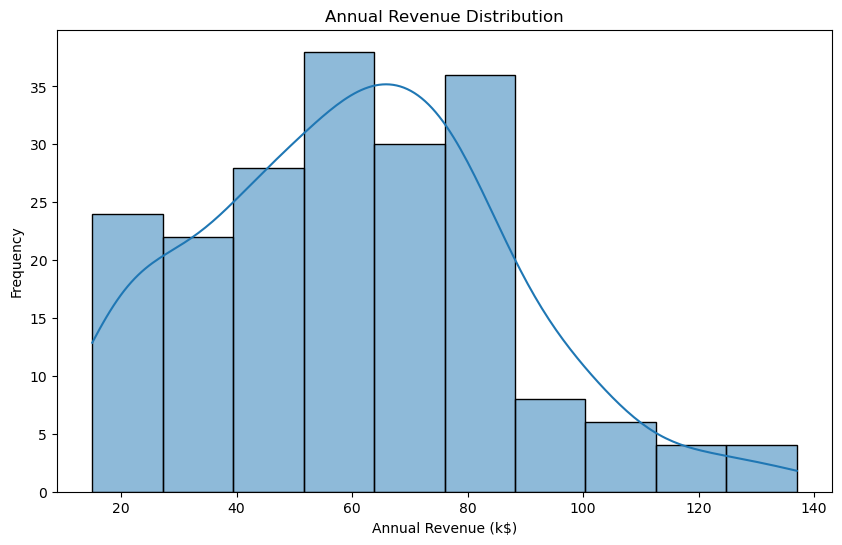

In [6]:

#checking skewness of our annual revenue column to be treated for better predictions
revenue_skewness = df['Annual Revenue (k$)'].skew()
print(f"Skewness of Annual Revenue: {revenue_skewness}")

# Visualizing
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Revenue (k$)'], kde=True)
plt.title('Annual Revenue Distribution')
plt.xlabel('Annual Revenue (k$)')
plt.ylabel('Frequency')
plt.show()

In [7]:
##skewness value of 0.321 indicates a slight positive skew, but this level of skewness isn't extreme

In [8]:
#preprocessing
numerical = ['Annual Revenue (k$)', 'Spending Score (1-100)']  # add any other numerical columns
categorical = ['City', 'Most Purchased Product']

# Build the preprocessing pipeline
pre = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),
        ('cat', OneHotEncoder(), categorical)
    ])

In [9]:
X = pre.fit_transform(df)

In [10]:
#implementing k means for segmentation
kmeans = KMeans(n_clusters=5, random_state=42).fit(X)
df['Cluster'] = kmeans.labels_


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
cluster_map = {0: 'Miser', 1: 'Careful', 2: 'Spendthrift', 3: 'General', 4: 'Target'}
df['Nature'] = df['Cluster'].map(cluster_map)

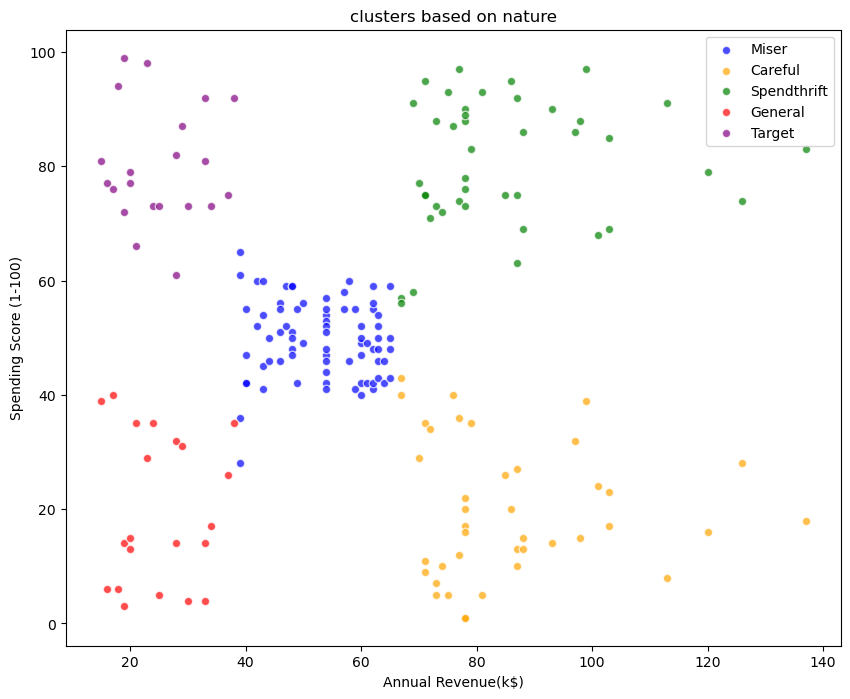

In [12]:
#plotting our clusters 
x_axis = 'Annual Revenue (k$)'
y_axis = 'Spending Score (1-100)'

fig, ax = plt.subplots(figsize=(10, 8))


nature_colors = {'Miser': 'blue', 'Careful': 'orange', 'Spendthrift': 'green', 'General': 'red', 'Target': 'purple'}


for nature, color in nature_colors.items():
    nature_data = df[df['Nature'] == nature]
    ax.scatter(nature_data[x_axis], nature_data[y_axis], label=nature, color=color, alpha=0.7, edgecolors='w')


ax.set_title('clusters based on nature')
ax.set_xlabel('Annual Revenue(k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.legend()

# display the plot
plt.show()


In [13]:
weights = {
    'Annual Revenue (k$)': 0.25,
    'Spending Score (1-100)': 0.5,
    'Repayment Score 1-5': 0.25
}

# to calculate credit score based on the weights defined above
def calculate_credit_score(row, weights):
    score = (row['Annual Revenue (k$)'] * weights['Annual Revenue (k$)'] + 
             row['Spending Score (1-100)'] * weights['Spending Score (1-100)'] + 
             row['Repayment Score 1-5'] * weights['Repayment Score 1-5'])
    return score

In [17]:
df['Credit_Score'] = df.apply(lambda row: calculate_credit_score(row, weights), axis=1)


In [18]:
### Creating a new column called credit worthy where
###if credit scores is greater than or equal to 60 the said person is credit worthy
df['Credit_Worthy'] = df['Credit_Score'].apply(lambda score: 'Yes' if score >= 60 else 'No')

In [19]:
#reviewing the file 
df

,Merchant Id,Annual Revenue (k$),Spending Score (1-100),City,Most Purchased Product,Repayment Score 1-5,Cluster,Nature,Credit_Worthy,Credit_Score
0,1,15,39,Mtwara,Mtindi 500ml,1,3,General,No,23.50
1,2,15,81,Zanzibar City,Fresh Milk 250ml,2,4,Target,No,44.75
2,3,16,6,Mtwara,Mtindi 500ml,3,3,General,No,7.75
3,4,16,77,Zanzibar City,Fresh Milk 250ml,4,4,Target,No,43.50
4,5,17,40,Mtwara,Mtindi 500ml,2,3,General,No,24.75
...,...,...,...,...,...,...,...,...,...,...
195,196,120,79,Dar es Salaam,Mtindi 250ml,4,2,Spendthrift,Yes,70.50
196,197,126,28,Dar es Salaam,Mtindi 250ml,3,1,Careful,No,46.25
197,198,126,74,Dar es Salaam,Mtindi 250ml,4,2,Spendthrift,Yes,69.50
198,199,137,18,Dar es Salaam,Mtindi 250ml,4,1,Careful,No,44.25


In [16]:
#saving the file into csv format
df.to_csv(r'C:\Users\PC\Desktop\Data Science Project\Customer Segmentation Project\Analyzed Data.csv', index=False)

In [36]:
####the end#####